In [1]:
# import libraries and helper functions
import pandas as pd
import numpy as np
from functions import * 
import matplotlib.pyplot as plt
import seaborn as sns

# set it so we can see all columns
pd.set_option('display.max_columns', None)

# set it so we can see all rows
#pd.set_option('display.max_rows', None)

First we will import the data with CaseOrder as the Index Column

In [2]:
# read in churn csv file with CaseOrder as index
df = pd.read_csv('churn_raw_data.csv', index_col='CaseOrder')

In [3]:
# get the shape of the dataframe
df.shape

(10000, 51)

We have 10,000 rows representing unique customers and 51 columns for customer information.

In [4]:
# view head of dataframe
df.head(15)

,Unnamed: 0,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5
6,6,W303516,2b451d12-6c2b-4cea-a295-ba1d6bced078,Fort Valley,GA,Peach,31030,32.57032,-83.89040,17701,Urban,America/New_York,Chief Technology Officer,3.0,83.0,No Schooling Completed,Full Time,NaN,Never Married,Female,No,7.814859,15,3,1,No,One year,Yes,No,None,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,Electronic Check,7.000994,184.401558,1039.357983,3,3,3,2,4,3,3,3
7,7,U335188,6630d501-838c-4be4-a59c-6f58c814ed6a,Pioneer,TN,Scott,37847,36.43420,-84.27892,2535,Suburban,America/New_York,"Surveyor, hydrographic",0.0,NaN,Associate's Degree,Full Time,11467.50,Widowed,Male,Yes,11.129094,10,0,1,Yes,Month-to-month,No,No,DSL,Yes,No,No,No,No,Yes,Yes,Yes,No,Electronic Check,13.236774,200.064886,1907.242972,6,5,6,4,1,5,5,5
8,8,V538685,70ddaa89-b726-49dc-9022-2d655e4c7936,Oklahoma City,OK,Oklahoma,73109,35.43313,-97.52463,23144,Suburban,America/Chicago,Sales promotion account executive,2.0,NaN,Bachelor's Degree,Full Time,26759.64,Married,Female,Yes,7.594838,16,0,0,Yes,Month-to-month,No,No,DSL,No,No,No,Yes,No,No,No,No,Yes,Mailed Check,NaN,114.754111,979.612708,2,2,2,5,2,3,4,5
9,9,M716771,05a49ee3-8fd5-453a-a5f3-82b6cd986856,Saint Cloud,FL,Osceola,34771,28.27646,-81.16273,17351,Suburban,America/New_York,Teaching laboratory technician,2.0,49.0,"Some College, Less than 1 Year",Full Time,58634.51,Separated,Prefer not to answer,No,6.637259,20,2,3,NaN,Month-to-month,Yes,No,DSL,Yes,No,Yes,Yes,No,No,No,No,Yes,Bank Transfer(automatic),8.220686,118.366844,1312.874964,5,4,4,3,4,3,4,4


## Drop/Rename Variables

We can see here that we have a duplicate column matching the values in CaseOrder which we can drop.

In [5]:
# drop duplicate CaseOrder column
df = df.drop(columns='Unnamed: 0')

We can see that we have non-descriptive column names item1-item8. These are defined in the accompanying data worksheet as being certain survey metrics. We will give them appropriate names.

In [6]:
# create a dictionary of current column names mapping to desired column names
survey_dict = {'item1':'timely_responses', 'item2':'timely_fixes', 'item3':'timely_replacements', 
               'item4':'reliability', 'item5':'options', 'item6':'respectful_response', 
               'item7':'courteous_exchange', 'item8':'evidence_of_active_listening'}

# rename the column names based on survey_dict
df = df.rename(columns=survey_dict)

## Improperly Formatted Data

We can see that we have a zip code 783 in the first 15 items of the dataframe. Let's look at these rows that have a zip code of less than five numbers. 

In [7]:
# create an empty dataframe to store short zip codes
incorrect_zips = pd.DataFrame()

# get a list of all unique zip codes
zips = list(df['Zip'].unique())

# append rows containing short zip codes to incorrect_zips dataframe
for i in zips:
    if len(str(i)) < 5:
        incorrect_zips = incorrect_zips.append(df.loc[df['Zip'] == i])
        
# print length of incorrect zip codes dataframe 
print(f"There are {len(incorrect_zips)} incorrect zip codes")

# show head of incorrect zips dataframe
incorrect_zips.head()

There are 773 incorrect zip codes


,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,timely_responses,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,evidence_of_active_listening
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12,E243720,c32b8522-d62a-49b1-a77a-e0534cb1378b,Corozal,PR,Corozal,783,18.30410,-66.32847,33372,Rural,America/Puerto_Rico,Maintenance engineer,2.0,56.0,Bachelor's Degree,Full Time,18342.12,Married,Female,No,5.082821,17,1,1,No,Month-to-month,Yes,No,Fiber Optic,Yes,No,No,No,Yes,No,Yes,No,No,Electronic Check,NaN,148.364087,1180.588788,4,4,3,4,4,4,3,4
14,X44200,780992d3-d758-4152-aceb-5d59edda3d15,East Livermore,ME,Androscoggin,4228,44.43256,-70.11501,0,Urban,America/New_York,Learning disability nurse,5.0,NaN,No Schooling Completed,Retired,115114.57,Separated,Female,No,6.568344,14,1,0,No,Two Year,Yes,Yes,Fiber Optic,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,Bank Transfer(automatic),16.879220,185.659294,1948.694497,5,6,5,2,4,5,4,4
24,N37182,ab3bfaf3-94f1-4a14-b577-0e57178a7645,Baileyville,ME,Washington,4694,45.10333,-67.47223,2193,Urban,America/New_York,Event organiser,2.0,68.0,Bachelor's Degree,Full Time,79699.62,Divorced,Male,No,7.490199,9,0,0,NaN,One year,Yes,No,Fiber Optic,Yes,No,No,No,No,Yes,Yes,No,Yes,Electronic Check,8.543717,150.329512,945.380293,4,4,3,5,3,4,4,3
29,J887250,a49a3cbf-182c-49f5-b15f-e124582d2c8f,Moretown,VT,Washington,5660,44.24718,-72.74137,1716,Urban,America/New_York,Civil Service administrator,3.0,NaN,Regular High School Diploma,Full Time,NaN,Separated,Female,Yes,43.927052,13,2,0,Yes,One year,No,No,DSL,Yes,No,No,No,Yes,No,Yes,Yes,No,Bank Transfer(automatic),NaN,230.623765,1259.415493,3,4,3,3,2,4,4,2
1948,V296012,b9fff884-7872-4a17-887d-df29e34b0dea,Moretown,VT,Washington,5660,44.24718,-72.74137,1716,Rural,America/New_York,Medical secretary,0.0,42.0,"Some College, 1 or More Years, No Degree",Full Time,21084.49,Widowed,Male,No,5.387811,20,1,0,Yes,Month-to-month,No,No,DSL,No,No,No,Yes,Yes,No,No,No,No,Bank Transfer(automatic),21.613239,126.447875,2467.669888,3,4,3,4,2,4,4,5


After some quick searching it was discovered that the zip codes for the locations having short zip codes were missing their leading zeros. We will add these back to correct these zip codes.

In [8]:
# function to fill zip codes less than 5 numbers long with leading zeros
def fill_zeros(x):
    if len(x) < 6:
        return x.zfill(5)
    else:
        pass

In [9]:
# convert zip code type to string to add zeros
df.Zip = df.Zip.astype(str)

# apply zero filling function to zip codes.
df.Zip = df.Zip.apply(fill_zeros)

In [10]:
# show updated dataframe
df.head(15)

,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,timely_responses,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,evidence_of_active_listening
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5
6,W303516,2b451d12-6c2b-4cea-a295-ba1d6bced078,Fort Valley,GA,Peach,31030,32.57032,-83.89040,17701,Urban,America/New_York,Chief Technology Officer,3.0,83.0,No Schooling Completed,Full Time,NaN,Never Married,Female,No,7.814859,15,3,1,No,One year,Yes,No,None,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,Electronic Check,7.000994,184.401558,1039.357983,3,3,3,2,4,3,3,3
7,U335188,6630d501-838c-4be4-a59c-6f58c814ed6a,Pioneer,TN,Scott,37847,36.43420,-84.27892,2535,Suburban,America/New_York,"Surveyor, hydrographic",0.0,NaN,Associate's Degree,Full Time,11467.50,Widowed,Male,Yes,11.129094,10,0,1,Yes,Month-to-month,No,No,DSL,Yes,No,No,No,No,Yes,Yes,Yes,No,Electronic Check,13.236774,200.064886,1907.242972,6,5,6,4,1,5,5,5
8,V538685,70ddaa89-b726-49dc-9022-2d655e4c7936,Oklahoma City,OK,Oklahoma,73109,35.43313,-97.52463,23144,Suburban,America/Chicago,Sales promotion account executive,2.0,NaN,Bachelor's Degree,Full Time,26759.64,Married,Female,Yes,7.594838,16,0,0,Yes,Month-to-month,No,No,DSL,No,No,No,Yes,No,No,No,No,Yes,Mailed Check,NaN,114.754111,979.612708,2,2,2,5,2,3,4,5
9,M716771,05a49ee3-8fd5-453a-a5f3-82b6cd986856,Saint Cloud,FL,Osceola,34771,28.27646,-81.16273,17351,Suburban,America/New_York,Teaching laboratory technician,2.0,49.0,"Some College, Less than 1 Year",Full Time,58634.51,Separated,Prefer not to answer,No,6.637259,20,2,3,NaN,Month-to-month,Yes,No,DSL,Yes,No,Yes,Yes,No,No,No,No,Yes,Bank Transfer(automatic),8.220686,118.366844,1312.874964,5,4,4,3,4,3,4,4


First let's check that all rows in our dataframe are unique.

## Duplicate Data

In [11]:
# function to show duplicate rows in dataframe
get_dupes(df)

There are no Duplicate Values

Now we will check the individual columns which should not have duplicate data, the Customer_id and Interaction Columns.

In [12]:
get_dupes(df['Customer_id'])

There are no Duplicate Values

In [13]:
get_dupes(df['Interaction'])

There are no Duplicate Values

## Null Data

Now let's take a look at which columns have null data

In [14]:
# function to show null data counts per column
null_vals(df)

index,Null Values
Customer_id,0
Interaction,0
City,0
State,0
County,0
Zip,0
Lat,0
Lng,0
Population,0
Area,0


We can see that Children, Age, Income, Techie, Phone, TechSupport, Tenure and Bandwidth_GB_year all have some null data. WE will address these individually.

### Children

Let's look at the distribution of children amongst our customers

In [15]:
# get a dataframe of the normalized value counts for children in dataframe
dataframe(df['Children'].value_counts(normalize=True))

,Children
0.0,0.255696
1.0,0.249700
2.0,0.146569
3.0,0.146036
4.0,0.102465
5.0,0.021452
8.0,0.021053
7.0,0.019853
6.0,0.017988
10.0,0.009860


Most of our customers have 0-1 Children.
Let's take a look at the median amount of children.

In [16]:
# get median of children.
df['Children'].median()

1.0

We could just assign the median for children, but since more people tend to have no children, let's randomly assign 0 or 1 to the missing children data, to keep the values more organic.

In [17]:
# change the NA values of children to 0 or 1 randomly
df.loc[df['Children'].isna(), 'Children'] = np.random.choice([0,1], len(df.loc[df['Children'].isna(), 'Children']))

### Ages
Next we will take a look at the entries missing ages

In [18]:
# locate where in the dataframe the ages are NA
df.loc[df['Age'].isna()]

,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,timely_responses,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,evidence_of_active_listening
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,U335188,6630d501-838c-4be4-a59c-6f58c814ed6a,Pioneer,TN,Scott,37847,36.43420,-84.27892,2535,Suburban,America/New_York,"Surveyor, hydrographic",0.0,NaN,Associate's Degree,Full Time,11467.50,Widowed,Male,Yes,11.129094,10,0,1,Yes,Month-to-month,No,No,DSL,Yes,No,No,No,No,Yes,Yes,Yes,No,Electronic Check,13.236774,200.064886,1907.242972,6,5,6,4,1,5,5,5
8,V538685,70ddaa89-b726-49dc-9022-2d655e4c7936,Oklahoma City,OK,Oklahoma,73109,35.43313,-97.52463,23144,Suburban,America/Chicago,Sales promotion account executive,2.0,NaN,Bachelor's Degree,Full Time,26759.64,Married,Female,Yes,7.594838,16,0,0,Yes,Month-to-month,No,No,DSL,No,No,No,Yes,No,No,No,No,Yes,Mailed Check,NaN,114.754111,979.612708,2,2,2,5,2,3,4,5
14,X44200,780992d3-d758-4152-aceb-5d59edda3d15,East Livermore,ME,Androscoggin,04228,44.43256,-70.11501,0,Urban,America/New_York,Learning disability nurse,5.0,NaN,No Schooling Completed,Retired,115114.57,Separated,Female,No,6.568344,14,1,0,No,Two Year,Yes,Yes,Fiber Optic,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,Bank Transfer(automatic),16.879220,185.659294,1948.694497,5,6,5,2,4,5,4,4
21,X325271,ebf7fbd7-9f65-48d8-8f82-b7b7fd4f3412,Kaneville,IL,Kane,60144,41.83594,-88.52060,69,Rural,America/Chicago,Counsellor,4.0,NaN,Nursery School to 8th Grade,Retired,39624.21,Never Married,Male,No,12.186698,14,0,3,NaN,Month-to-month,No,No,Fiber Optic,Yes,No,Yes,Yes,Yes,No,No,Yes,Yes,Bank Transfer(automatic),20.453910,185.096264,2330.319383,2,3,3,2,4,2,3,3
29,J887250,a49a3cbf-182c-49f5-b15f-e124582d2c8f,Moretown,VT,Washington,05660,44.24718,-72.74137,1716,Urban,America/New_York,Civil Service administrator,3.0,NaN,Regular High School Diploma,Full Time,NaN,Separated,Female,Yes,43.927052,13,2,0,Yes,One year,No,No,DSL,Yes,No,No,No,Yes,No,Yes,Yes,No,Bank Transfer(automatic),NaN,230.623765,1259.415493,3,4,3,3,2,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,O298138,b3b0eb22-a173-4636-ad76-0356426fcb6d,Coahoma,MS,Coahoma,38617,34.34947,-90.52248,681,Urban,America/Chicago,Wellsite geologist,1.0,NaN,Bachelor's Degree,Full Time,72449.84,Widowed,Male,No,11.145680,9,3,0,Yes,One year,No,Yes,Fiber Optic,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Electronic Check,48.244540,242.507200,4647.637000,3,3,3,5,4,5,4,4
9988,C454652,c4cb88a8-dd44-46a4-84e7-891edf25cbaf,Chicago,IL,Cook,60647,41.92068,-87.70167,87509,Urban,America/Chicago,"Editor, magazine features",0.0,NaN,"9th Grade to 12th Grade, No Diploma",Full Time,102629.60,Married,Female,No,7.231711,8,1,0,No,One year,No,Yes,None,Yes,Yes,No,No,Yes,No,Yes,Yes,No,Electronic Check,54.545380,219.019400,5135.576000,4,4,3,5,3,3,3,3
9993,B614851,ce7abedd-6437-4609-9123-8a4a8234381e,Haubstadt,IN,Gibson,47639,38.17985,-87.57497,4261,Suburban,America/Chicago,"Therapist, occupational",1.0,NaN,Regular High School Diploma,Full Time,35876.21,Divorced,Male,No,9.729936,15,2,0,Yes,Two Year,No,Yes,Fiber Optic,Yes,No,No,No,No,No,Yes,No,Yes,Electronic Check,56.472330,137.956100,5001.371000,3,2,4,3,4,3,4,3


There is nothing obviously wrong with these entries less the missing ages.
One way to fill these might be by checking the average age of people by employment status, education, or children, since these life statuses tend to be indicitive of age, and filling in the missing values based on the averages from these values. Let's first look at the ages of those who are retired in our data to see if there is an average we can work off of.

In [19]:
# get a dataframe of the statistics of the ages of those who are retired
dataframe(df.loc[df.Employment == 'Retired', 'Age'].describe())

,Age
count,748.000000
mean,53.782086
std,20.760362
min,18.000000
25%,36.000000
50%,54.000000
75%,72.000000
max,89.000000


We see above that our minimum age of retirement is 18, which seems young to be retired. Let's look at the rows of retired 18 year old customers.

In [20]:
# locate retired 18-year-olds in our data
df.loc[(df.Employment == 'Retired') & (df.Age == 18)]

,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,timely_responses,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,evidence_of_active_listening
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
930,X685005,35a2a1c7-ccfb-44fb-8d33-a58c6de5cf91,Eagle,ID,Ada,83616,43.77416,-116.39257,28275,Suburban,America/Boise,"Editor, commissioning",0.0,18.0,Regular High School Diploma,Retired,29810.90,Never Married,Prefer not to answer,No,6.474813,11,0,0,No,Two Year,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes,Mailed Check,2.729452,150.825266,NaN,4,3,4,3,4,3,2,2
1514,D872983,2241ca16-372e-4e94-a863-6b6bf342ead0,Davenport Center,NY,Delaware,13751,42.45080,-74.90131,105,Rural,America/New_York,Chief Marketing Officer,5.0,18.0,GED or Alternative Credential,Retired,NaN,Never Married,Female,Yes,9.237206,15,0,1,No,Month-to-month,No,No,Fiber Optic,No,Yes,No,No,No,No,Yes,Yes,No,Electronic Check,7.080759,239.859435,1363.832113,4,3,4,4,2,4,2,2
2006,U282565,0bb64178-1fa9-4f1e-9adf-63fb87b4c665,Provo,UT,Utah,84601,40.22724,-111.69697,34312,Urban,America/Denver,Housing manager/officer,0.0,18.0,Professional School Degree,Retired,19789.59,Divorced,Female,No,4.952179,10,2,0,No,Two Year,No,No,Fiber Optic,Yes,Yes,No,No,No,No,No,No,Yes,Mailed Check,NaN,145.231588,278.440525,3,3,3,3,2,5,5,5
2902,W260869,c244fcfc-b066-4c2b-b35f-7870dddbbb27,Shelby,MI,Oceana,49455,43.60959,-86.36634,4787,Rural,America/Detroit,Gaffer,0.0,18.0,Master's Degree,Retired,32713.07,Never Married,Female,Yes,13.606829,13,0,0,No,Month-to-month,Yes,No,Fiber Optic,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Electronic Check,9.448434,253.695328,1489.056859,3,3,4,6,4,4,1,3
2970,T938913,005799ab-9afe-47c2-88f8-50567d8f6c07,O Kean,AR,Randolph,72449,36.17748,-90.81964,298,Suburban,America/Chicago,Industrial buyer,2.0,18.0,No Schooling Completed,Retired,NaN,Married,Female,No,7.300748,16,0,0,No,Month-to-month,Yes,Yes,None,Yes,No,No,No,Yes,No,No,No,No,Electronic Check,12.786972,93.557779,1294.950837,4,4,4,4,4,4,3,3
6310,L731384,67b6faee-ff6d-41fd-97f4-621f524decb5,Belfast,TN,Marshall,37019,35.39228,-86.70980,548,Suburban,America/Chicago,Chartered accountant,0.0,18.0,Master's Degree,Retired,50066.53,Widowed,Male,No,11.997350,14,0,1,No,Month-to-month,No,Yes,Fiber Optic,Yes,No,No,No,No,No,Yes,No,No,Electronic Check,45.223750,136.758200,4048.902000,4,4,4,4,4,3,3,4
8223,O574674,9f99ad13-bf24-4432-99e0-ac3d40ef808f,Dixon,WY,Carbon,82323,41.04457,-107.49890,143,Urban,America/Denver,Dentist,1.0,18.0,Regular High School Diploma,Retired,20164.01,Never Married,Male,No,8.799714,14,0,0,No,Month-to-month,Yes,No,Fiber Optic,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,Electronic Check,55.449910,194.896000,5068.173000,3,3,4,5,2,4,3,4
9142,J155263,46b13ca3-bf5d-4c60-a005-a26b524e4f60,Stony Brook,NY,Suffolk,11794,40.91379,-73.12532,2952,Suburban,America/New_York,Web designer,3.0,18.0,"9th Grade to 12th Grade, No Diploma",Retired,72397.73,Widowed,Female,No,12.953060,8,3,0,NaN,Month-to-month,No,Yes,DSL,Yes,No,No,Yes,No,No,No,No,No,Mailed Check,66.806460,115.504600,6174.314000,3,4,3,2,4,3,2,1
9483,U174484,d582dd72-b540-4a6b-8dcc-b58c2a8fae6f,Cleveland,NY,Oswego,13042,43.26755,-75.85561,2604,Rural,America/New_York,Herbalist,0.0,18.0,Nursery School to 8th Grade,Retired,NaN,Never Married,Male,No,10.478420,10,0,0,No,Month-to-month,Yes,Yes,None,No,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Electronic Check,71.999280,233.369900,6745.440000,3,2,3,5,3,4,2,3


We can see here that we have some irregular data. We have an 18-year-old with 5 children, and another with a Master's degree, which are unusual life statuses for an 18 year old. Let's look at retired 19-year-olds.

In [21]:
# locate retired 19-year-olds in our data
df.loc[(df.Employment == 'Retired') & (df.Age == 19)]

,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,timely_responses,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,evidence_of_active_listening
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
262,L187290,7c264f96-9897-4449-ae2b-de3e94de3b9c,Rand,CO,Jackson,80473,40.42501,-106.13465,4,Urban,America/Denver,"Scientist, research (life sciences)",4.0,19.0,Regular High School Diploma,Retired,44426.28,Widowed,Male,Yes,6.319517,20,0,0,No,Month-to-month,Yes,Yes,Fiber Optic,No,Yes,No,Yes,No,No,No,Yes,Yes,Electronic Check,NaN,202.493072,905.195923,3,2,4,3,3,3,4,2
1558,P67575,68494f1e-807b-493a-9bf1-9f163cc1f373,Peoria,IL,Peoria,61602,40.67471,-89.60746,877,Suburban,America/Chicago,"Administrator, charities/voluntary organisations",1.0,19.0,"Some College, 1 or More Years, No Degree",Retired,14075.36,Widowed,Male,Yes,11.563869,18,1,1,No,Month-to-month,Yes,Yes,Fiber Optic,Yes,No,Yes,No,Yes,NaN,No,Yes,No,Electronic Check,10.121231,163.755547,1359.631961,4,4,3,4,3,2,4,2
2094,S372424,565e9895-9713-449b-b6c3-4fe9738c2160,Valrico,FL,Hillsborough,33594,27.94074,-82.24196,35465,Suburban,America/New_York,"Solicitor, Scotland",8.0,19.0,"Some College, 1 or More Years, No Degree",Retired,48821.75,Never Married,Male,No,11.562844,11,1,0,NaN,One year,Yes,Yes,None,Yes,No,No,No,Yes,No,Yes,No,No,Credit Card (automatic),3.744207,117.666653,978.302699,3,3,4,4,2,4,3,4
2114,Q420319,ac48bbf8-e24e-4473-9403-a95489fb3eb9,Kingsland,TX,Llano,78639,30.66282,-98.44043,8409,Suburban,America/Chicago,Graphic designer,7.0,19.0,"Some College, 1 or More Years, No Degree",Retired,48531.85,Separated,Male,Yes,5.176247,13,0,0,No,Two Year,Yes,No,None,Yes,Yes,No,No,No,NaN,Yes,Yes,No,Bank Transfer(automatic),10.999523,219.338014,1794.594938,4,4,5,4,2,5,4,3
3437,S113370,9091992c-0667-4cad-841e-ceb4a9ecd4a7,Cedar Lake,IN,Lake,46303,41.37127,-87.47637,14644,Suburban,America/Chicago,Fast food restaurant manager,1.0,19.0,Regular High School Diploma,Retired,57667.86,Widowed,Male,No,7.988645,16,0,1,No,Month-to-month,No,No,DSL,Yes,Yes,No,No,No,Yes,No,Yes,Yes,Mailed Check,11.647630,172.658100,1814.121000,3,3,4,2,4,3,3,3
3841,E304383,330bee11-c38d-466e-b4af-787f64dfa650,Saint Paul,AR,Madison,72760,35.83086,-93.70994,297,Urban,America/Chicago,Horticultural therapist,1.0,19.0,"Some College, 1 or More Years, No Degree",Retired,39163.80,Widowed,Male,No,12.975870,11,0,0,No,Two Year,Yes,No,Fiber Optic,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Electronic Check,10.334270,194.179500,1387.672000,3,3,3,3,4,1,3,2
3886,B981530,8b2824dc-2cd5-406b-a621-a7aab4eba1c7,Dennison,OH,Tuscarawas,44621,40.42752,-81.29587,4476,Urban,America/New_York,Metallurgist,1.0,19.0,Regular High School Diploma,Retired,13233.40,Separated,Female,Yes,12.541270,11,0,0,No,Month-to-month,Yes,No,Fiber Optic,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Mailed Check,12.524700,205.017700,1555.076000,4,5,6,4,2,3,4,4
4417,F533118,071f31ba-794b-4590-8bd9-4dcb0d2b12c0,Wahkon,MN,Mille Lacs,56386,46.11173,-93.52019,622,Suburban,America/Chicago,Clinical molecular geneticist,6.0,19.0,"9th Grade to 12th Grade, No Diploma",Retired,77498.99,Widowed,Female,No,7.892894,9,0,1,No,Month-to-month,No,No,None,NaN,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Credit Card (automatic),16.275720,187.681400,2141.952000,2,4,3,4,5,3,3,3
5172,E391117,9eb78ba1-058c-45f7-883e-1780a0b152ee,Bronx,NY,Bronx,10473,40.81817,-73.85876,59609,Urban,America/New_York,"Restaurant manager, fast food",0.0,19.0,"9th Grade to 12th Grade, No Diploma",Retired,14260.84,Divorced,Female,No,8.450126,13,0,1,Yes,Month-to-month,No,No,None,Yes,No,Yes,No,Yes,No,No,Yes,No,Electronic Check,71.847740,130.01080

We have retired 19-year-olds with 6, 7 and 8 children who are widowed, divorced or retired.
We can assume by these, that this dataset is randomly generated, and it would not be very meaningful to assign ages based on any life factors. It would be just as well to randomly assign ages in the age range of our data to these entries.

In [22]:
# get the statistical data for ages in our data.
dataframe(df.Age.describe())

,Age
count,7525.000000
mean,53.275748
std,20.753928
min,18.000000
25%,35.000000
50%,53.000000
75%,71.000000
max,89.000000


It seems that our ages range from 1-89, so we will assign random values from this range to those entries missing data.

In [23]:
# create random ages in age range
age_range = np.arange(start=18, stop=89)

# assign random ages in age range to NA ages in our data
df.loc[df.Age.isna(), 'Age'] = np.random.choice(age_range, len(df.loc[df.Age.isna(), 'Age']))

### Techie
Next we will look at the values we have for 'Techie'

In [24]:
# get normalized value counts for Techie column
dataframe(df['Techie'].value_counts(normalize=True))

,Techie
No,0.832912
Yes,0.167088


We can see above that around 83% of our customers are not Techie and around 17% are Techie. For the missing values in Techie we will assign 'Yes' and 'No' values based on the distribution we already have based on the more precise numbers above.

In [25]:
# find where Techie is NA and assign a random Yes or No value based on the current distribution of Yes and No values
df.loc[df['Techie'].isna(), 'Techie'] = np.random.choice(["Yes", "No"], len(df.loc[df['Techie'].isna(), 'Techie']), p=[0.167088, .832912])

### Phone and TechSupport 

For the missing Phone and TechSupport values we will use the same method as for the missing Techie values.

In [26]:
# get a dataframe of the current distribution of Phone values
dataframe(df['Phone'].value_counts(normalize=True))

,Phone
Yes,0.905728
No,0.094272


In [27]:
# find where Phone is NA and assign a random Yes or No value based on the current distribution of Yes and No values
df.loc[df['Phone'].isna(), 'Phone'] = np.random.choice(['Yes', 'No'], len(df.loc[df['Phone'].isna(), 'Phone']), p=[.91, 0.09])

In [28]:
# get a dataframe of the current distribution of TechSupport values 
dataframe(df['TechSupport'].value_counts(normalize=True))

,TechSupport
No,0.625486
Yes,0.374514


In [29]:
# find where TechSupport is NA and assign a random Yes or No value based on the current distribution of Yes and No values
df.loc[df['TechSupport'].isna(), 'TechSupport'] = np.random.choice(['Yes', 'No'], len(df.loc[df['TechSupport'].isna(), 'TechSupport']), p=[0.374514,0.625486])

### Income

Here we will work with the missing income data.

In [30]:
# get the statistical information for customer income
dataframe(df['Income'].describe())

,Income
count,7510.000000
mean,39936.762226
std,28358.469482
min,740.660000
25%,19285.522500
50%,33186.785000
75%,53472.395000
max,258900.700000


Above we can see that the maximum income of over 250,000 is well above our mean of around $40000.

In this case it is better to assign the median income to the customers with missing income data, since those large values in the higher end of customers are likely bringing up our mean.

In [31]:
# assign the median income to NA incomes
df.loc[df['Income'].isna(), 'Income'] = df['Income'].median()

### Tenure
Next we will look at the Tenure information for customers

In [32]:
# get the statistical information for customer tenure
dataframe(df['Tenure'].describe())

,Tenure
count,9069.000000
mean,34.498858
std,26.438904
min,1.000259
25%,7.890442
50%,36.196030
75%,61.426670
max,71.999280


In customer tenure we see that we have high and low values bringing the mean up and down, similar to what we saw in income. Again, for these we will assign the median customer tenure.

In [33]:
# assign the median Tenure to NA Tenures
df.loc[df['Tenure'].isna(), 'Tenure'] = df['Tenure'].median()

### Bandwidth Per Year (GB)
Finally we will look at the Bandwidth per Year in GB

In [34]:
# get a dataframe of the statistics of Bandwidth per year
dataframe(df['Bandwidth_GB_Year'].describe())

,Bandwidth_GB_Year
count,8979.000000
mean,3398.842752
std,2187.396807
min,155.506715
25%,1234.110529
50%,3382.424000
75%,5587.096500
max,7158.982000


As with Income and Tenure we will assign the median of these values to each customer to be consistent with our current data distribution.

In [35]:
# assign the median Bandwidth_GB_Year to NA Bandwidth_GB_Year
df.loc[df['Bandwidth_GB_Year'].isna(), 'Bandwidth_GB_Year'] = df['Bandwidth_GB_Year'].median()

## Data Type Conversion

Next let's look at the datatypes for our data.

In [36]:
# function to get datatypes per column of dataframe
get_dtypes(df)

index,Type
Customer_id,object
Interaction,object
City,object
State,object
County,object
Zip,object
Lat,float64
Lng,float64
Population,int64
Area,object


We can see that we have a great deal of objects in our datatype that would be better suited to string or category, while columns such as children and age may be better as integers. We will convert these now.

In [37]:
# change the dataframe columns to more appropriate data types
df = df.astype( {'Customer_id':'string', 'Interaction':'string', 'City':'string', 'State':'string', 'County':'string', 'Zip':'string', 'Lat':float,
       'Lng':float, 'Population':int, 'Area':'category', 'Timezone':'category', 'Job':'category', 'Children':int, 'Age':int,
       'Education':'category', 'Employment':'category', 'Income':float, 'Marital':'category', 'Gender':'category', 'Churn':'category',
       'Outage_sec_perweek':float, 'Email':int, 'Contacts':int, 'Yearly_equip_failure':int,
       'Techie':'category', 'Contract':'category', 'Port_modem':'category', 'Tablet':'category', 'InternetService':'category',
       'Phone':'category', 'Multiple':'category', 'OnlineSecurity':'category', 'OnlineBackup':'category',
       'DeviceProtection':'category', 'TechSupport':'category', 'StreamingTV':'category', 'StreamingMovies':'category',
       'PaperlessBilling':'category', 'PaymentMethod':'category', 'Tenure':float, 'MonthlyCharge':float,
       'Bandwidth_GB_Year':float, 'timely_responses':int, 'timely_fixes':int, 'timely_replacements':int, 'reliability':int, 'options':int,
       'respectful_response':int, 'courteous_exchange':int, 'evidence_of_active_listening':int}, copy=False)

# return our new dataframe of datatypes
get_dtypes(df)

index,Type
Customer_id,string
Interaction,string
City,string
State,string
County,string
Zip,string
Lat,float64
Lng,float64
Population,int32
Area,category


## Unique Values

In [38]:
unique_vals(df)

Our unique values in the variables above do not seem to contain any problems.

## Numerical Data

In [39]:
# get the statstical data for all numeric columns in our dataframe
df.describe()

,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,timely_responses,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,evidence_of_active_listening
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.757567,-90.782536,9756.562400,1.69490,53.086800,38256.017897,11.452955,12.016000,0.994200,0.398000,34.656864,174.076305,3397.166397,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,5.437389,15.156142,14432.698671,2.00764,20.654276,24747.872761,7.025921,3.025898,0.988466,0.635953,25.182812,43.335473,2072.718575,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,17.966120,-171.688150,0.000000,0.00000,18.000000,740.660000,-1.348571,1.000000,0.000000,0.000000,1.000259,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,35.341828,-97.082812,738.000000,0.00000,35.000000,23660.790000,8.054362,10.000000,0.000000,0.000000,8.700329,141.071078,1312.130487,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,39.395800,-87.918800,2910.500000,1.00000,53.000000,33186.785000,10.202896,12.000000,1.000000,0.000000,36.196030,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,42.106908,-80.088745,13168.000000,3.00000,71.000000,45504.192500,12.487644,14.000000,2.000000,1.000000,60.153487,203.777441,5466.284500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,70.640660,-65.667850,111850.000000,10.00000,89.000000,258900.700000,47.049280,23.000000,7.000000,6.000000,71.999280,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


We can see above that the minimum for Population is 0. This is not possible, since our customer, at least, lives there. To deal with these missing populations we will assign the mean population from each of the areas a customer lives in (Rural, Suburban, Urban) and assign those values to the missing populations.

In [40]:
# get a list of all possible areas
areas = df['Area'].unique()

In [41]:
# assign the mean populations in each area to the area in a dictionary
area_dict = {}
for i in areas:
    area_dict[i] = df.loc[df['Area'] == i]['Population'].mean()

In [42]:
# assign the mean area populations to the missing population values based on their area in the dictionary.
for k, v in area_dict.items():
    df.loc[(df['Population'] == 0) & (df['Area'] == k), 'Population'] = v

Also noticable on our numerical data is that there is a negative minimum value for outage seconds per week. Since it is not possible for the internet to be out for a negative amount of time, we will set these negative values to 0.

In [43]:
# assign 0 to negative values for outage seconds per week
df.loc[df['Outage_sec_perweek'] < 0, 'Outage_sec_perweek'] = 0

## Data Export

In [44]:
# export a copy of the cleaned dataset
df.to_csv('cleaned_churn_data.csv')

## PCA

In [48]:
from sklearn.decomposition import PCA

In [51]:
survey_mets = ['timely_responses', 'timely_fixes', 'timely_replacements', 'reliability', 'options', 'respectful_response', 'courteous_exchange', 'evidence_of_active_listening']
normalized_mets = dataframe(columns=survey_mets)

In [52]:
for i in survey_mets:
    normalized_mets[i] = (df[i] - df[i].mean())/df[i].std()

In [55]:
pca = PCA(n_components = normalized_mets.shape[1])

In [56]:
pca.fit(normalized_mets)

PCA(n_components=8)

In [57]:
mets_pca = dataframe(pca.transform(normalized_mets), columns=survey_mets)

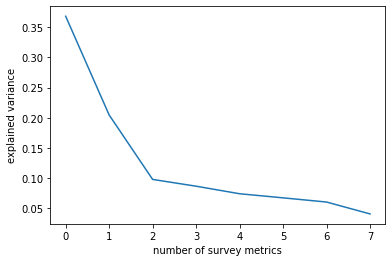

In [59]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of survey metrics')
plt.ylabel('explained variance')
plt.show()

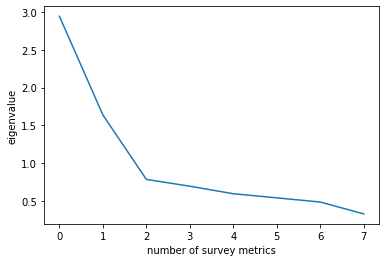

In [62]:
cov_matrix = np.dot(normalized_mets.T, normalized_mets)/normalized_mets.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]
plt.plot(eigenvalues)
plt.xlabel('number of survey metrics')
plt.ylabel('eigenvalue')
plt.show()

In [65]:
loadings = dataframe(pca.components_.T,
                    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'],
                    index=normalized_mets.columns)

In [66]:
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
timely_responses,0.459030,0.282717,-0.069221,0.120013,-0.044752,0.025032,-0.241688,0.793174
timely_fixes,0.434342,0.285321,-0.106259,0.170235,-0.064900,0.074672,-0.591586,-0.574375
timely_replacements,0.400775,0.282950,-0.173885,0.254689,-0.148134,-0.396761,0.673403,-0.177149
reliability,0.145686,-0.569898,-0.171525,0.482754,-0.444692,0.431115,0.086961,0.018610
options,-0.175385,0.591292,0.135315,-0.060906,-0.211030,0.693537,0.265272,-0.041198
respectful_response,0.405197,-0.183897,-0.061988,-0.063712,0.757170,0.403694,0.231751,-0.064123
courteous_exchange,0.358413,-0.181067,-0.184917,-0.806749,-0.378391,0.067449,0.066043,-0.040309
evidence_of_active_listening,0.308851,-0.132624,0.931619,0.009229,-0.114326,-0.044789,0.046267,-0.042500


In [67]:
pca.explained_variance_ratio_

array([0.36836495, 0.20468446, 0.0978762 , 0.08661771, 0.07411777,
       0.06731005, 0.06035434, 0.04067451])

In [68]:
pca.components_

array([[ 0.45903041,  0.43434169,  0.40077542,  0.1456856 , -0.17538491,
         0.40519696,  0.35841312,  0.30885068],
       [ 0.2827173 ,  0.28532059,  0.28295015, -0.56989752,  0.59129232,
        -0.18389689, -0.1810671 , -0.13262407],
       [-0.06922083, -0.10625923, -0.17388546, -0.17152484,  0.13531468,
        -0.06198783, -0.18491701,  0.93161885],
       [ 0.12001252,  0.17023521,  0.25468899,  0.48275448, -0.06090584,
        -0.06371189, -0.80674947,  0.00922901],
       [-0.04475174, -0.06489968, -0.14813369, -0.44469187, -0.21102984,
         0.75717036, -0.37839121, -0.11432586],
       [ 0.02503164,  0.07467241, -0.39676073,  0.43111527,  0.69353735,
         0.40369367,  0.06744883, -0.04478854],
       [-0.24168774, -0.59158584,  0.67340276,  0.08696139,  0.26527163,
         0.23175066,  0.06604293,  0.0462665 ],
       [ 0.79317414, -0.57437502, -0.1771488 ,  0.01861047, -0.04119768,
        -0.06412293, -0.04030899, -0.04250013]])